# Dynamic Modelling for Human-Centered Systems
## Assignment 3: L2-PYTHON tutorial (emotion contagion model)
In this week’s assignment we want to familiarize you with working with models in Python. You will
learn some of the programming behind the implementation of an existing model into Python. For this
exercise, you will require Python 3 and the assignment 3 zip.
## Part 1: Installing Python
You have likely already installed Python for the previous courses, however if you have not done so go
to <a href="python.org" title="python.org">python.org</a> to download and install it. Any version of Python 3 will likely work, but we used 3.8 for reference. When installing Python, don’t forget to tick the “add to PATH” box during setup so that your computer can find it. <br>
In addition to Python you will need two libraries: matplotlib and numpy, you can install them by running the following cell

In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install inspect
# !pip install os
# !pip install prettytable

In [2]:
from l2 import StateMachine, INF
state_machine = StateMachine()

## Part 2: Conceptualizing the model
Before we can impelement the model in python we have to design it. We do this in three steps: 
1. Draw a graph that illustrates the relations between concepts
2. Formalize the concepts into predicates using a table
3. Formalize the rules that is the logic of running the model



### Description of the model
We will create a model of emotion contagion step by step. The model is described in Bosse et al.
(2009) and revolves around the concepts shown in Figure 1 below. A short description of the model is
given here.

> Each person has an <em>emotion level</em>, <em>expressiveness</em> and <em>openness</em>. Between each two persons there is a <em>channel strength</em> which can be different strenghts depending on which direction it goes. The expressiveness affects how strongly that person influences other people's emotion level, the openness is the opposite and affects how strongly someone is influenced by others. The channel strength models how strong the relation is between two people and does not have to be symmetric. These three factors can be summarized into the <em>contagion strength</em> which models how strongly the emotion level of person A affects the emotion level of person B.

The relation between the concepts in the text can be illustrated with the following graph: 

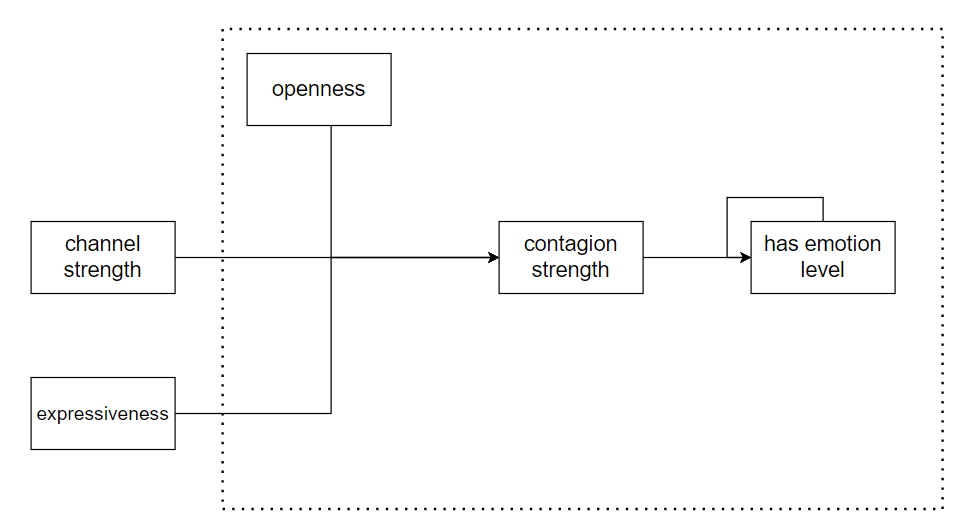


#### Concept table

| Concept | Description of use | formalization |
| ----------- | ----------- | ----------- |
| Emotion level | The emotion level of a person | has_emotion_level(A:Agent, R:Real) | 
| Openness | How easily a person is affected by others | has_opensess(A:Agent, R:Real) | 
| Expressiveness | How easily a person affects others | has_expressiveness(A:Agent, R:Real) | 
| Channel strength | The strength of a relation between two people | has_channel_strength(A:Agent, A:Agent, R:Real) | 
| Contagion strength | The calculated value of how stronglhy person A affects person B | has_contagion_strength(A:Agent, A:Agent, R:Real) | 



#### DDR1 Determining contagion strengths
contagion_strength(t+dt, AgentA, AgentX) = has_openness(t, AgentA) * has_expressiveness(t, AgentX) * has_channel_strength(t, AgentA, AgentX) FOR EVERY AgentX
#### DDR2 Updating emotion levels
has_emotion_level(t+dt, AgentA) = has_emotion_level(t, AgentA) + has_contagion_strength(t, AgentA, AgentX) * (has_emotion_level(t, AgentX) - has_emotion_level(t, AgentA)) FOR EVERY AgentX


## Part 2: implementing the model
To implement the model please refer to the Template and Documentation

### sorts
This model makes use of two sorts, real numbers for all the numeric values and a sort AGENT for
naming the particular agents. REAL is a sort that is available by default, however the sort AGENT
needs to be implemented. Therefore, take the following steps to create an AGENT sort (that can have the values arnie, bernie, charlie):

In [3]:
state_machine.sorts = {
    "AGENT": ["arnie", "bernie", "charlie"]
}

The StateMachine contains the following defined sorts, besides BOOLEAN and REAL: 
+-----------+------------------------+
| Sort name |      Sort values       |
+-----------+------------------------+
|   AGENT   | arnie, bernie, charlie |
+-----------+------------------------+


### predicates
The predicates dictionary will contain the ‘concepts’ of our model and use the sorts we have defined to assign values to these concepts. This will probably become more clear once you implement the predicates and use them in building your model. In the Python implementation, predicates are implemented as a Python <em>class</em>. <br>
In the predicates file, predicates are defined in a way similar to the sorts: define the predicate name and then the sorts it should take. The Predicates that you have to add can all be found in the predicate table. 

In [4]:
state_machine.predicates = {
    "has_emotion_level": ["AGENT", "REAL"],
    "has_openness": ["AGENT", "REAL"],
    "has_expressiveness": ["AGENT", "REAL"],
    "has_channel_strength": ["AGENT", "AGENT", "REAL"],
    "has_contagion_strength": ["AGENT", "AGENT", "REAL"]
}



The StateMachine contains the following predicates with their corresponding sorts: 
+------------------------+----------------------------+
|     Predicate name     |           Sorts            |
+------------------------+----------------------------+
|   has_emotion_level    |     ['AGENT', 'REAL']      |
|      has_openness      |     ['AGENT', 'REAL']      |
|   has_expressiveness   |     ['AGENT', 'REAL']      |
|  has_channel_strength  | ['AGENT', 'AGENT', 'REAL'] |
| has_contagion_strength | ['AGENT', 'AGENT', 'REAL'] |
+------------------------+----------------------------+


In order to allow our rules to use the class Predicate, we have to import it. We can do this by using the following import rule:

In [5]:
from l2 import Predicate
# In addition, we import inspect, for debug purposes
import inspect

### scenarios
To define an initial scenario for our simulations, a third dictionary needs to be created named
scenarios.<br>
In this dictionary we indicate what values our predicates take for certain time points in the simulation. Let’s say we need some initial values to be able to run the simulation (as we have already seen in previous models) we define this here.<br>
We use pattern matching to determine the values of our predicates and then specify an array of time
points for which these values hold, like so:<br><br>
<em>predicate_name{value_SORT1, value_SORT2}; [timepoint]</em><br><br>
or <br><br>
<em>predicate_name{value_SORT1, value_SORT2}; [t_start:t_end]</em><br><br>
We can also replace t_end by INF in case we want this to be true for the entire length of our
simulation. Now the following data needs to be added to the scenarios file in the same way for the emotion
contagion model.
- <em>has_expressiveness</em> for agent arnie is 0.2 for time points 1 through 50
- <em>has_expressiveness</em> for agent bernie is 0.8 for time points 1 through 50
- agent arnie has an openness of 0.8 for the first 50 time points
- agent bernie has an openness of 0.2 for the first 50 time points
- the channel strength between arnie and bernie & between bernie and arnie is 1 at any point during the simulation
- arnie’s initial emotion level is 0.2
- bernie’s initial emotion level is 0.8



In [6]:
state_machine.scenario = [
    ("has_expressiveness", ["arnie", 0.2], [1, 50]),
    ("has_expressiveness", ["bernie", 0.8], [1, 50]),
    ("has_openness", ["arnie", 0.8], [1, 50]),
    ("has_openness", ["bernie", 0.2], [1, 50]),
    ("has_channel_strength", ["arnie", "bernie", 1], [1, INF]),
    ("has_channel_strength", ["bernie", "arnie", 1], [1, INF]),
    ("has_emotion_level", ["arnie", 0.2], [1, 2]),
    ("has_emotion_level", ["bernie", 0.8], [1, 2])
]

### Recap
We have created three dictionaries. In sorts we defined a sort AGENT, which included three
different agents as its elements. In predicates, predicates were defined that are used in the model (e.g., <em>has_openness</em>). The possible values used in these predicates are of the sort AGENT defined before or the predefined sort REAL. In scenarios we defined the initial values for a simulation, thus the expressiveness, openness and channel strength for the entire simulation as well as the initial emotion value for both Arnie and Bernie.

### Rules
The rules are defined in this section. <br>
To make the model dynamic, we need to create a set of rules defining the dynamics of the model. In this case, there are two rules; one for calculating the contagion strength, and a second for updating the emotion levels. We will define the rules after defining the general structure. Make sure you study the model template and documentation beforehand, it will make implementing the rules much easier. 

### DDR1
Let us now start creating the rule to calculate the contagion strengths step by step. That is, rule DDR1 in the previous description. The first thing we need to do is make sure we calculate the contagion strength for each possible combination of two agents.

##### STEP 1
As a first step, we go through each value for has_expressiveness, such that at least we find each agent that expresses some emotion on a particular time point. Use the function *get_predicate()* and check the documentation for instructions on how to use it.


##### STEP 2
Now, if we look at each channel strength from this agent (let's call them agent1) to any other agent (let's call them agent2), we can find all the agents this agent influences. Therefore, in the next part of this rule, another for loop is created going through each channel strength originating from the current agent. Because we need a specific agent, use the function *get_predicate_by_agent()* and once again consult the documentation.


##### STEP 3
To calculate the contagion strength, we also need to know the openness of the receiving agent. This can again be done by simply using the *get_predicate_by_agent()* function, just make sure this time that you are searching by agent2.

##### STEP 4
At this point, we have all the information required to calculate the contagion strength. Now we’re going to calculate the value for the contagion strength at the new time point t. to do that, remember that it is calculated by multiplying all the values. It would also be convenient to round the value by, say, 3 decimals. 

##### STEP 5
In this function, many values for contagion strength are calculated for different combinations of agents. All of these results need to be added to the next state. To do so first construct the predicates by making new *Predicate* objects. Then, add them to the next state using the *add_predicate_to_state()* function. 




In [7]:
def set_contagion_strength(states, t):
    """
        set the contagion strength between agents based on their expressiveness, and the other agent his/hers
        openness.
        First the previous state is retrieved.
        Secondly, there is a for-loop to go over each has_expressiveness predicate. agent1 and his/hers
        expressiveness is retrieved from the predicate.
        Afterwards, there is a for-loop to go over each has_channel_strength, where agent1 is the first agent of
        the has_channel_strength predicate. agent2 is also retrieved from this predicate.
        Next, the openness of agent2 is retrieved from the has_openness predicate, and the contagion strength
        between the 2 agents is calculated.
        Finally, the new information for the predicate has_contagion_strength is appended to the
        new_predicates list, which is eventually added to the states predicates under the key has_contagion_strength

    """
    previous_state = states[t - 1]

    for agent1, agent1_expressiveness in previous_state.get_predicate("has_expressiveness"):
        for agent1, agent2, has_channel_strength in previous_state.get_predicate_by_agent("has_channel_strength", agent1, index = 0):
            agent2, agent2_openness = previous_state.get_single_predicate_by_agent("has_openness", agent2, index = 0)

            contagion_strength = round(agent2_openness * agent1_expressiveness * has_channel_strength, 3)
            new_predicate = Predicate("has_contagion_strength", [agent2, agent1], contagion_strength) # Here the order of the list: [agent2, agent1] will determine the "direction" of the contagion strength so whether the predicate we add will be arnie -> bernie = 0.04 or 0.64 & bernie -> arnie = 0.04 or 0.64
            # In the DDR1 rule contagion_strength(t+dt, AgentA, AgentX) = has_openness(t, AgentA) * has_expressiveness(t, AgentX) * has_channel_strength(t, AgentA, AgentX) FOR EVERY AgentX, we deducted that we should add the predicate of contagion strength from the agent that retrieved "has_openness" directed to the agent that retrieved "has_expressiveness", therefore from agent2 -> agent1 in this function
            states[t].add_predicate_to_state(new_predicate)

### DDR2

DDR2 can be added in a similar way. Try to code DDR2 by yourself. If you do not manage, check the template again or ask your TA. 

In [8]:
def set_emotion_level(states, t):
    """
        set the emotion level of an agent based on their emotion level, and the emotion level of other agent they have a contagion with.
        First the previous state is retrieved.
        Secondly, there is a for-loop to go over each has_emotion_level predicate. This loop goes over every receiving agent (agent1).
        Thirdly, there is a for-loop to retrieve the contagion_strength of each other agent. This loop goes over every sending agent (agent2)
        Fourthly, the matching emotion_level from every contagion_strength is retreived (so from every sending agent2).
        Afterwards, the emotion change is calculated by the formula: contagion_strength * (emotion_agent2 - emotion_agent1)

        Finally, the new information for the predicate has_emotion_level for agent 1 is appended to the
        new_predicates list, which is eventually added to the states predicates under the key has_emotion_level

    """
    previous_state = states[t - 1]
    

    for agent1, emotion_agent1 in previous_state.get_predicate("has_emotion_level"):
        for _, agent2, contagion in previous_state.get_predicate_by_agent("has_contagion_strength", agent1):
            for _, emotion_agent2 in previous_state.get_predicate_by_agent("has_emotion_level", agent2):
            
                
                emotion_level =  round((emotion_agent1 + (contagion * (emotion_agent2 - emotion_agent1) * 0.15)), 3) # multiplication by 0.15 added for a better visualization of a pattern of emtion levels of both agents. If kept default the emotion levels of both agents are decreasing very quick.
                new_predicate = Predicate("has_emotion_level", [agent1], emotion_level)
                states[t].add_predicate_to_state(new_predicate)
                print(f'Emotion level increase: {emotion_level}')

In [17]:
expressiveness = state_machine.states[1].get_predicate("has_expressiveness")
print(expressiveness)

expressiveness_bernie = state_machine.states[1].get_predicate("has_expressiveness")[1]
print(expressiveness_bernie)

expressiveness_arnie = state_machine.states[1].get_predicate("has_expressiveness")[0]
print(expressiveness_arnie)

expressiveness_arnie_value = state_machine.states[1].get_predicate("has_expressiveness")[0].get_value()
print(expressiveness_arnie_value)

[<l2.state.Predicate object at 0x1076d12a0>, <l2.state.Predicate object at 0x10b25d000>]
has_expressiveness(bernie) = 0.8
has_expressiveness(arnie) = 0.2
0.2


## Part 3: Running the model
Before we can run the model, we have to define which rules should be included. We do this by creating a list called "rules", in which we put the created rules. You can create additional auxillary python functions that are not put in this list for your own convenience. 

In [9]:
rules = [set_contagion_strength, set_emotion_level]
state_machine.rules = rules

Let's run our StateMachine and start the simulation!

In [10]:
state_machine.run()

The predicate "has_contagion_strength" is not found in the state with time 1
The possible predicates in the state with time 1 are: has_expressiveness, has_openness, has_channel_strength, has_emotion_level
The possible predicates in the state with time 1 are: has_expressiveness, has_openness, has_channel_strength, has_emotion_level
The predicate "has_contagion_strength" is not found in the state with time 1
The possible predicates in the state with time 1 are: has_expressiveness, has_openness, has_channel_strength, has_emotion_level
The possible predicates in the state with time 1 are: has_expressiveness, has_openness, has_channel_strength, has_emotion_level
Emotion level increase: 0.258
Emotion level increase: 0.796
Emotion level increase: 0.31
Emotion level increase: 0.793
Emotion level increase: 0.356
Emotion level increase: 0.79
Emotion level increase: 0.398
Emotion level increase: 0.787
Emotion level increase: 0.435
Emotion level increase: 0.785
Emotion level increase: 0.469
Emotio

### Visualization
In order to see the result of the simulation, we have to visualize it. We can do this by using the <em>run_visualization</em> function. This function takes as arguments the StateMachine and a list of predicates you do NOT want to plot (in this case <em>has_expressiveness</em>)

The following predicates will be visualized:
has_openness
has_channel_strength
has_emotion_level
has_contagion_strength


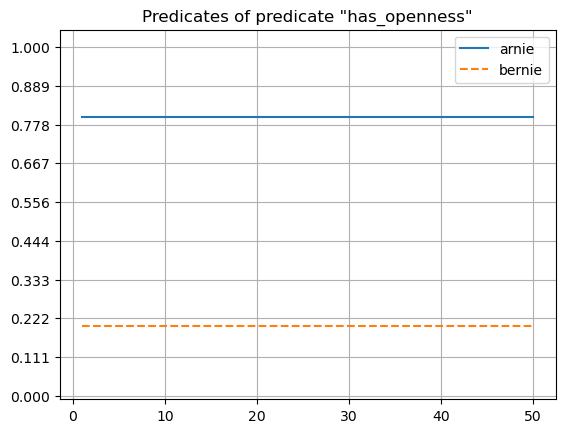

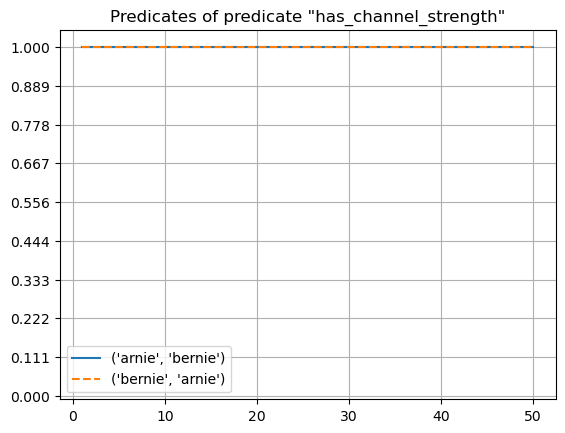

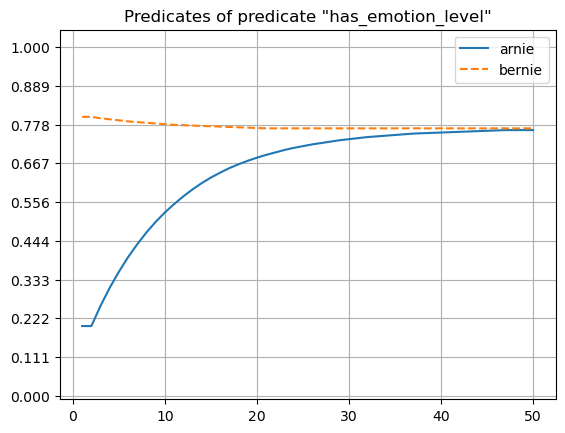

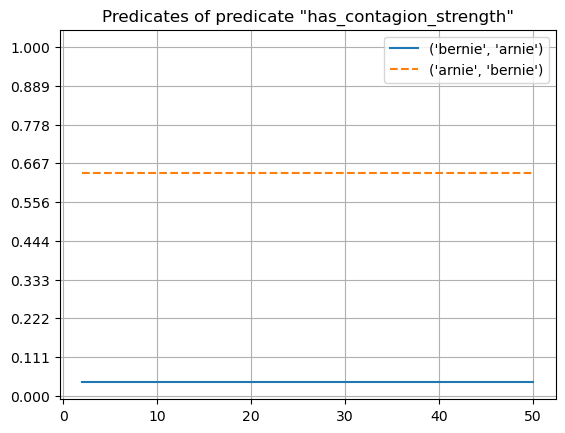

In [11]:
from l2 import run_visualization
run_visualization(state_machine, ["has_expressiveness"])

# Debug
If you want to debug, you can simply pass the argument "debug_mode=True" when running the StateMachine.
In addition, it is shown to you which rule caused the error.

In [12]:

# Run debug_mode
state_machine.run(debug_mode=True)

The StateMachine runs in Debug mode!

The StateMachine contains the following defined sorts, besides BOOLEAN and REAL: 
+-----------+------------------------+
| Sort name |      Sort values       |
+-----------+------------------------+
|   AGENT   | arnie, bernie, charlie |
+-----------+------------------------+

The StateMachine contains the following predicates with their corresponding sorts: 
+------------------------+----------------------------+
|     Predicate name     |           Sorts            |
+------------------------+----------------------------+
|   has_emotion_level    |     ['AGENT', 'REAL']      |
|      has_openness      |     ['AGENT', 'REAL']      |
|   has_expressiveness   |     ['AGENT', 'REAL']      |
|  has_channel_strength  | ['AGENT', 'AGENT', 'REAL'] |
| has_contagion_strength | ['AGENT', 'AGENT', 'REAL'] |
+------------------------+----------------------------+
The predicate "has_contagion_strength" is not found in the state with time 1
The possible predic

## Conclusion
By now, you have seen most of l2-python’s functionality. However, much of what you can do using
l2-matlab hinges on your Python knowledge. As you become more and more experienced using
Python, you will be able to write even more complex rules for your models or create your own graphs
for your simulation results. Later in this course you will also learn different kind of models but until then you will receive additional practise with this kind of model.
## References
Bosse, T., Duell, R., Memon, Z.A., Treur, J., and Wal, C.N. van der (2009), A Multi-Agent Model for
Mutual Absorption of Emotions. In: Otamendi, J., Bargiela, A., Montes, J.L., Pedrera, L.M.D.
(eds.), Proceedings of the 23th European Conference on Modelling and Simulation, ECMS'09.
European Council on Modeling and Simulation, 2009, pp. 212-218.